In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. load data
# change data -> torch tensor
# use transforms.Compose to normalize
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),
                                                   (0.5,0.5,0.5))])

# use CIFAR10 to make train, test data
# DataLoader returns iterator
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=True, num_workers=2)


100.0%

Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

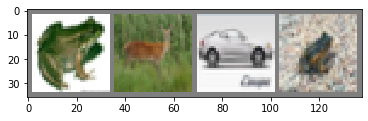

 frog ///  deer ///   car ///  frog


In [7]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' /// '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
# 2. make nn
# use pre-defined model(resnet18)

net = models.resnet18()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
# 3. setting training process
# epoch = 1 because of slow train speed T.T
epoches = 1
for epoch in range(epoches):
    print('\n ===> epoch %d' % epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #get the inputs
        inputs, labels = data
        
        #zero the parameter gradients
        optimizer.zero_grad()
        #forward->backward->optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        #print statistics
        running_loss += loss.item()
        
        #print train result for every 2000 batches
        if i % 2000 == 1999:
            print('[%d, %5d] loss : %.3f' %
                 (epoch +1, i+1, running_loss/2000))
            running_loss = 0.0


 ===> epoch 0
[1,  2000] loss : 2.380
[1,  4000] loss : 2.046
[1,  6000] loss : 1.923
[1,  8000] loss : 1.844
[1, 10000] loss : 1.780
[1, 12000] loss : 1.717

 ===> epoch 1


Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/anaconda3/envs/pytorch/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
   

KeyboardInterrupt: 

In [10]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100*class_correct[i] / class_total[i]))


Accuracy of plane : 55 %
Accuracy of   car : 58 %
Accuracy of  bird : 26 %
Accuracy of   cat : 30 %
Accuracy of  deer : 14 %
Accuracy of   dog : 56 %
Accuracy of  frog : 40 %
Accuracy of horse : 38 %
Accuracy of  ship : 61 %
Accuracy of truck : 40 %
